In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from numpy import arange

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

import sklearn.metrics as sm
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#Focusing on 100 choices from 200 subjects as a first step
choice_100 = pd.read_csv('IGTdataSteingroever2014\choice_100.csv')
choice_100 = choice_100[:200]

In [3]:
#All data types are the same and the original matrix is clean
choice_100.dtypes

Choice_1      int64
Choice_2      int64
Choice_3      int64
Choice_4      int64
Choice_5      int64
              ...  
Choice_96     int64
Choice_97     int64
Choice_98     int64
Choice_99     int64
Choice_100    int64
Length: 100, dtype: object

In [4]:
cluster = KMeans(n_clusters = 5)
cols = choice_100.columns[:]
cols

Index(['Choice_1', 'Choice_2', 'Choice_3', 'Choice_4', 'Choice_5', 'Choice_6',
       'Choice_7', 'Choice_8', 'Choice_9', 'Choice_10', 'Choice_11',
       'Choice_12', 'Choice_13', 'Choice_14', 'Choice_15', 'Choice_16',
       'Choice_17', 'Choice_18', 'Choice_19', 'Choice_20', 'Choice_21',
       'Choice_22', 'Choice_23', 'Choice_24', 'Choice_25', 'Choice_26',
       'Choice_27', 'Choice_28', 'Choice_29', 'Choice_30', 'Choice_31',
       'Choice_32', 'Choice_33', 'Choice_34', 'Choice_35', 'Choice_36',
       'Choice_37', 'Choice_38', 'Choice_39', 'Choice_40', 'Choice_41',
       'Choice_42', 'Choice_43', 'Choice_44', 'Choice_45', 'Choice_46',
       'Choice_47', 'Choice_48', 'Choice_49', 'Choice_50', 'Choice_51',
       'Choice_52', 'Choice_53', 'Choice_54', 'Choice_55', 'Choice_56',
       'Choice_57', 'Choice_58', 'Choice_59', 'Choice_60', 'Choice_61',
       'Choice_62', 'Choice_63', 'Choice_64', 'Choice_65', 'Choice_66',
       'Choice_67', 'Choice_68', 'Choice_69', 'Choice_70', '

In [5]:
choice_100["cluster"] = cluster.fit_predict(choice_100[choice_100.columns[1:]])
choice_100.head()
choice_100.tail()

,Choice_1,Choice_2,Choice_3,Choice_4,Choice_5,Choice_6,Choice_7,Choice_8,Choice_9,Choice_10,...,Choice_92,Choice_93,Choice_94,Choice_95,Choice_96,Choice_97,Choice_98,Choice_99,Choice_100,cluster
Subj_196,4,2,3,1,4,2,3,1,4,2,...,1,3,3,3,3,3,3,3,3,2
Subj_197,3,3,3,2,2,2,2,2,4,4,...,4,2,2,2,2,2,2,2,2,3
Subj_198,1,1,1,1,1,1,1,2,2,2,...,4,4,4,4,4,4,4,4,4,0
Subj_199,2,2,2,2,2,2,2,2,2,1,...,4,1,3,3,3,3,3,3,3,3
Subj_200,1,1,1,2,2,2,2,2,2,2,...,4,4,4,4,4,4,4,4,4,0


In [6]:
pca = PCA(n_components = 2)
choice_100["x"] = pca.fit_transform(choice_100[cols])[:,0]
choice_100["y"] = pca.fit_transform(choice_100[cols])[:,1]
choice_100 = choice_100.reset_index()
choice_100.tail()

,index,Choice_1,Choice_2,Choice_3,Choice_4,Choice_5,Choice_6,Choice_7,Choice_8,Choice_9,...,Choice_94,Choice_95,Choice_96,Choice_97,Choice_98,Choice_99,Choice_100,cluster,x,y
195,Subj_196,4,2,3,1,4,2,3,1,4,...,3,3,3,3,3,3,3,2,1.105869,1.234054
196,Subj_197,3,3,3,2,2,2,2,2,4,...,2,2,2,2,2,2,2,3,-1.154505,1.662163
197,Subj_198,1,1,1,1,1,1,1,2,2,...,4,4,4,4,4,4,4,0,3.482359,7.287164
198,Subj_199,2,2,2,2,2,2,2,2,2,...,3,3,3,3,3,3,3,3,-5.739960,-1.209768
199,Subj_200,1,1,1,2,2,2,2,2,2,...,4,4,4,4,4,4,4,0,6.347627,-0.082115


In [9]:
df = choice_100[["index", "cluster", "x", "y"]]
df.columns = ["Subjects", "Cluster", "X", "Y"]
df.head()

,Subjects,Cluster,X,Y
0,Subj_1,3,-2.911773,-1.124068
1,Subj_2,1,0.371965,1.531962
2,Subj_3,3,-3.021308,-0.008141
3,Subj_4,1,1.220158,-1.627644
4,Subj_5,1,0.067286,-0.325107


<AxesSubplot:xlabel='X', ylabel='Y'>

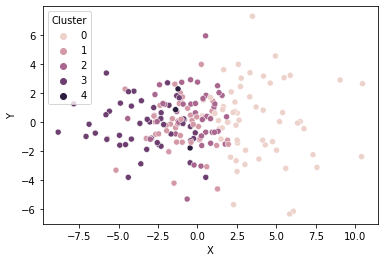

In [13]:
import seaborn as sns
sns.scatterplot(data=df,x="X", y="Y", hue="Cluster")